In [1]:
# gerekli kütüphaneleri import ediyorum
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('C:\\Users\\Merve\\Desktop\\vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Rank  - Genel satışların sıralaması

Name  - Oyunun adı

Platform - Oyunun yayınlandığı platform (ör. PC, PS4 vb.)

Year  - Oyunun yayınlandığı yıl

Genre  - Oyunun türü

Publisher  - Oyunun yayıncısı

NA_Sales - Kuzey Amerika'daki satışlar (milyon olarak)

EU_Sales - Avrupa'daki satışlar (milyon olarak)

JP_Sales - Japonya'daki satışlar (milyon olarak)

Other_Sales - Dünyanın geri kalanındaki satışlar (milyon olarak)

Global_Sales - Dünya çapındaki toplam satış.

In [3]:
data.shape# veri seti hakkında bilgiler ediniyorum

(16598, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
data.isna().sum()# boş değerleri kontrol ediyorum

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
# boş değerleri sildim 
data.dropna(inplace=True)
#veri çerçevesinin indeksini sıfırladım
data = data.reset_index(drop = True)
# daha sonra ise yenilenen indexlerin bir fazlasını rank olarak düzenledim
data.loc[:, 'Rank'] = np.arange(data.shape[0])+1

In [8]:
data.tail(50)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16241,16242,Bookworm Deluxe,PC,2006.0,Puzzle,PopCap Games,0.01,0.00,0.00,0.0,0.01
16242,16243,Hakuoki: Reimeiroku - Omouhase Kara,PSV,2015.0,Action,Idea Factory,0.00,0.00,0.01,0.0,0.01
16243,16244,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.0,0.01
16244,16245,God Eater Off Shot: Tachibana Sakuya-hen Twin ...,PS4,2016.0,Action,Namco Bandai Games,0.00,0.00,0.01,0.0,0.01
16245,16246,Sweet Honey Coming,PS2,2009.0,Adventure,Kadokawa Shoten,0.00,0.00,0.01,0.0,0.01
16246,16247,Mahou Sensei Negima!? Neo-Pactio Fight!!,Wii,2007.0,Fighting,Marvelous Interactive,0.00,0.00,0.01,0.0,0.01
16247,16248,Psychic Detective,PS,1995.0,Adventure,Electronic Arts,0.01,0.00,0.00,0.0,0.01
16248,16249,Codename: Panzers Complete Collection,PC,2016.0,Strategy,Nordic Games,0.00,0.01,0.00,0.0,0.01
16249,16250,Super Robot Taisen: Original Generation,GBA,2002.0,Role-Playing,Banpresto,0.01,0.00,0.00,0.0,0.01
16250,16251,Dramatical Murder Re:code,PSV,2014.0,Adventure,Nitroplus,0.00,0.00,0.01,0.0,0.01


In [9]:
data.isna().sum()# boş değerleri kontrol ediyorum

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [10]:
data.duplicated().sum()# tekrarlayan değerleri kontrol ediyorum

0

In [11]:
# yıl değişkeni float olduğu için bunu inte çeviriyorum
data['Year'] = data['Year'].astype(int)

## Türler Hakkında

In [12]:
data['Genre'].unique()# oyunların  türleri

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [13]:
# toplam tür sayısı
data['Genre'].value_counts().count()

12

In [14]:
data['Genre'].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

<AxesSubplot:title={'center':'Türlere Göre Yayınlanan Oyun Sayıları '}, xlabel='Genre', ylabel='count'>

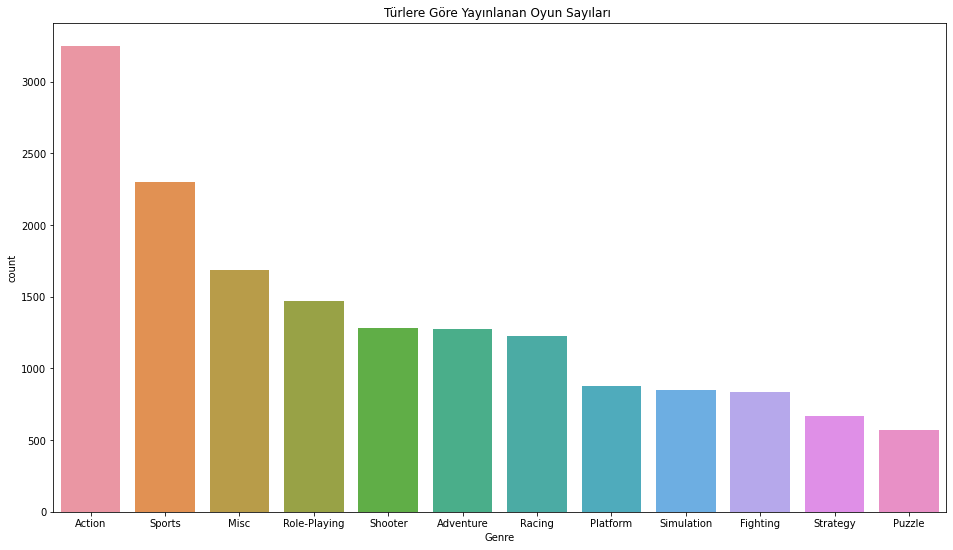

In [15]:
plt.figure(figsize=(16,9))
plt.title("Türlere Göre Yayınlanan Oyun Sayıları ")
sns.countplot(data=data,x="Genre",order=data["Genre"].value_counts().index)

In [16]:
top_genre = data[['Genre', 'Global_Sales',"NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]

top_genre=top_genre.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False).head(12)

top_genre=pd.DataFrame(top_genre).reset_index()


Text(0.5, 1.0, ' Global Satışlara Göre En  İyi Türler ')

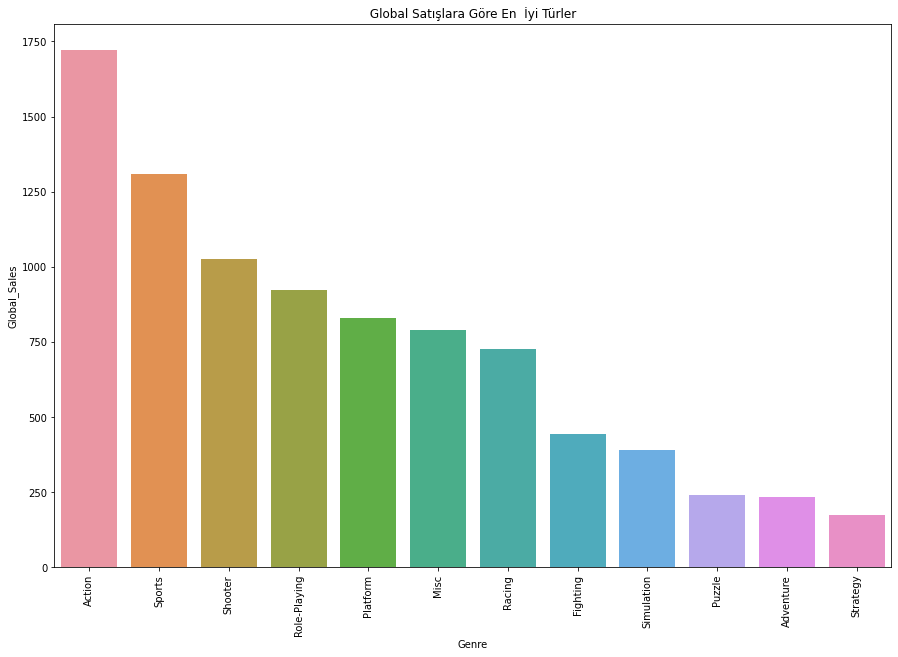

In [17]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
sns.barplot(x="Genre",y="Global_Sales" ,data=top_genre)
plt.title(" Global Satışlara Göre En  İyi Türler ")

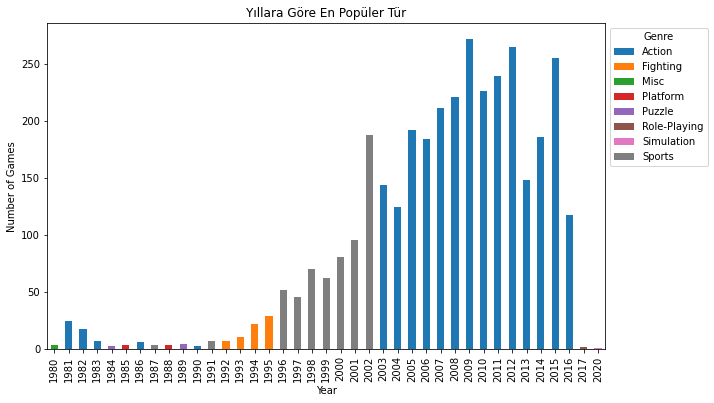

In [18]:
most_common_genre_per_year = data.groupby(['Year', 'Genre']).size().reset_index(name='Count')
most_common_genre_per_year = most_common_genre_per_year.loc[most_common_genre_per_year.groupby('Year')['Count'].idxmax()]
#idxmax(), bir Seri veya DataFrame içinde en büyük değere sahip olan ilk indeksi döndüren bir Pandas fonksiyonudur
#(yani en çok yayınlanan türü almış oluyoruz)

# Yıl bazında en çok yayınlanan oyun türlerini içeren DataFrame'i oluştur
result_df = most_common_genre_per_year.pivot(index='Year', columns='Genre', values='Count')

# Çubuk grafiği oluştur
result_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.title('Yıllara Göre En Popüler Tür')
plt.legend(title='Genre', bbox_to_anchor=(1, 1))
plt.show()

## Publisher hakkında

In [19]:
# yayıncılar ile alakalı bilgiler(en çok oyun yayınlayanlar)
data['Publisher'].value_counts()


Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Maximum Family Games               1
SSI                                1
Locus                              1
Culture Publishers                 1
Universal Gamex                    1
Name: Publisher, Length: 576, dtype: int64

In [20]:
data['Publisher'].value_counts().count()  # da aynı işi görür
#Publisher = data['Publisher'].nunique() #(number of unique)
#Publisher
#toplam yayıncı sayısı

576

In [21]:
top_publisher=data[["Publisher","Global_Sales"]]
top_publisher=top_publisher.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False).head(10)
top_publisher=pd.DataFrame(top_publisher).reset_index()

In [22]:
top_publisher.head(10)

,Publisher,Global_Sales
0,Nintendo,1784.43
1,Electronic Arts,1093.39
2,Activision,721.41
3,Sony Computer Entertainment,607.28
4,Ubisoft,473.54
5,Take-Two Interactive,399.30
6,THQ,340.44
7,Konami Digital Entertainment,278.56
8,Sega,270.70
9,Namco Bandai Games,253.65


Text(0.5, 1.0, ' Global Satışlara Göre  En İyi 10 Publisher')

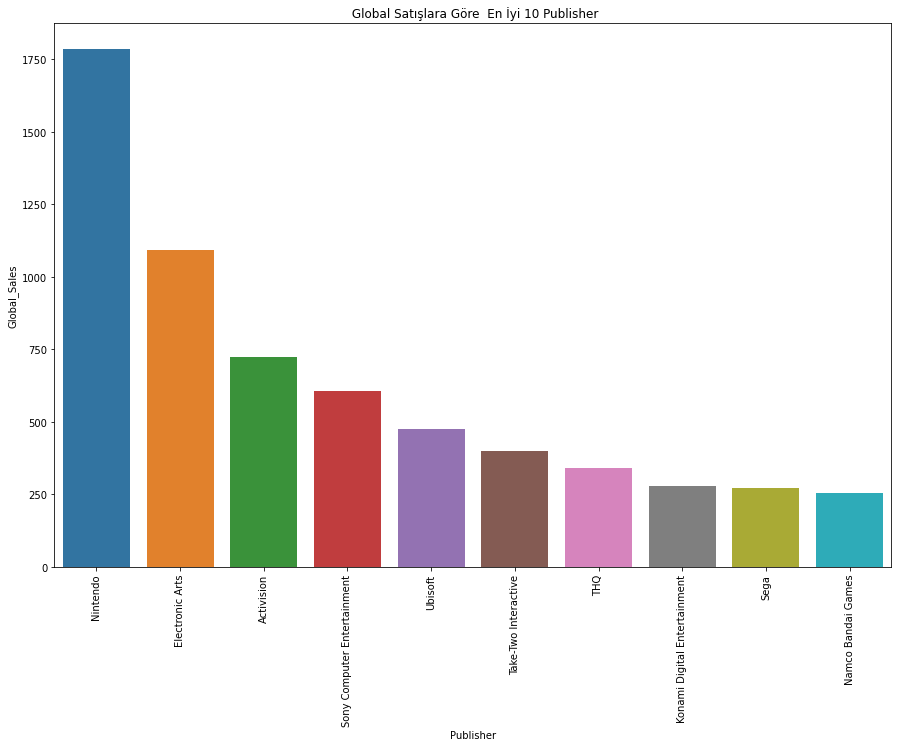

In [23]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
sns.barplot(x="Publisher",y="Global_Sales",data=top_publisher)
plt.title(" Global Satışlara Göre  En İyi 10 Publisher")

## Platformlar Hakkında

In [24]:
# oyunların Yayınlandığı platformlar
data['Platform'].value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [25]:
# toplam platform sayısı
data['Platform'].value_counts().count()

31

In [26]:
top_Platform = data[['Platform', 'Global_Sales']]
top_Platform=top_Platform.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False).head(10)
top_Platform=pd.DataFrame(top_Platform).reset_index()

Text(0.5, 1.0, ' Global Satışlara Göre  En İyi 10  Platform')

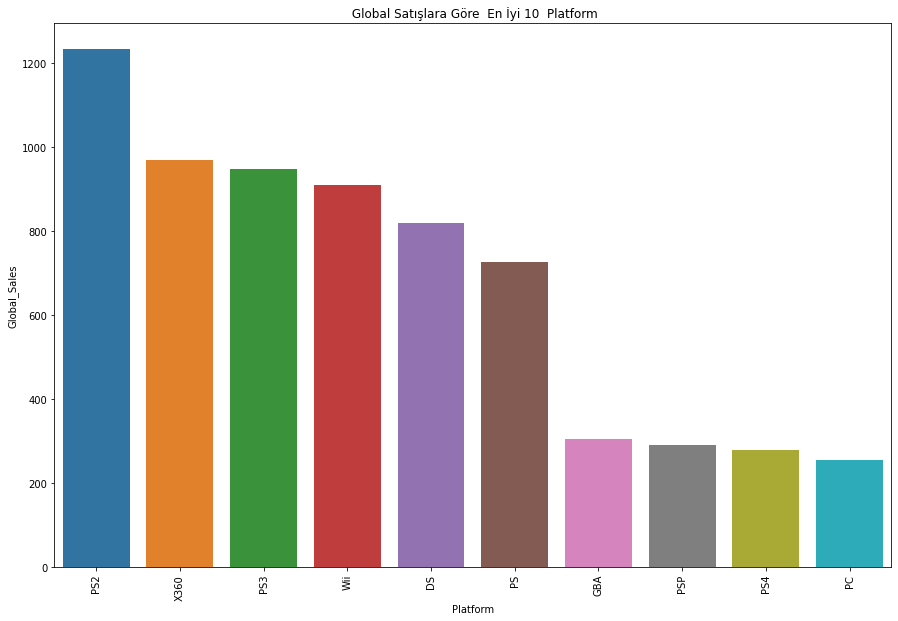

In [27]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
sns.barplot(x="Platform",y="Global_Sales" ,data=top_Platform)
plt.title(" Global Satışlara Göre  En İyi 10  Platform")

In [42]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [43]:
top_Platform = data[['Platform', 'Name']]
top_Platform=top_Platform.groupby("Platform")["Name"].count().sort_values(ascending=False).head(10)
top_Platform=pd.DataFrame(top_Platform).reset_index()

Text(0.5, 1.0, ' Global Satışlara Göre  En İyi 10  Platform')

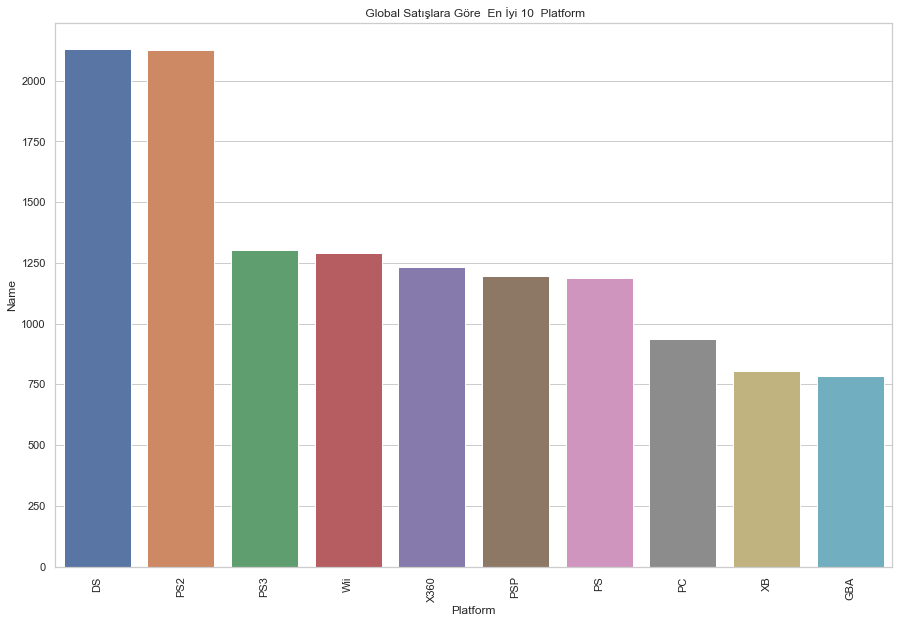

In [45]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
sns.barplot(x="Platform",y="Name" ,data=top_Platform)
plt.title(" Yayınlanan Oyun  Sayısına Göre  En İyi 10  Platform")

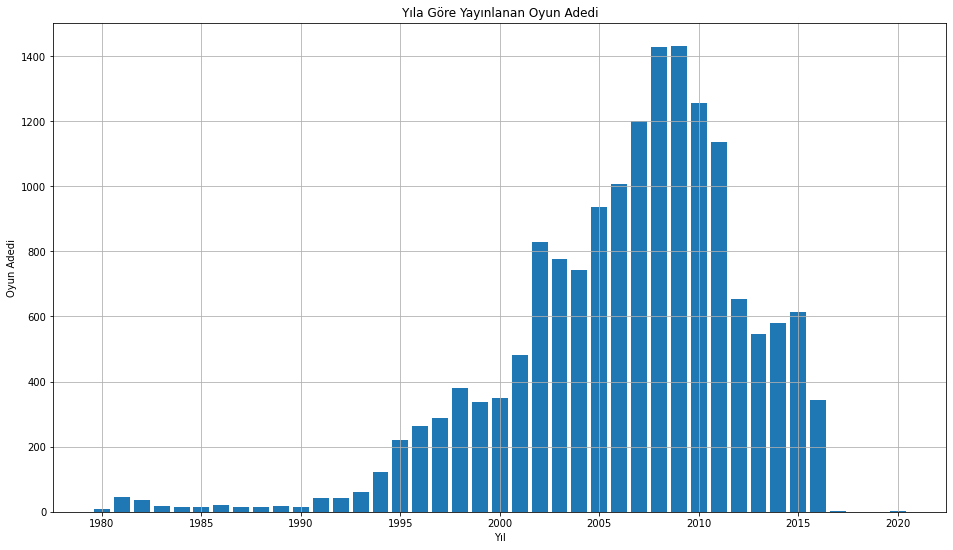

In [28]:
# Yıllara Göre Yayınlanan Oyun Sayısı
oyun_adetleri = data.groupby('Year')['Name'].count().reset_index()

# Çizgi grafiği ile görselleştirme
plt.figure(figsize=(16,9))
plt.bar(oyun_adetleri["Year"], oyun_adetleri["Name"])
plt.title('Yıla Göre Yayınlanan Oyun Adedi')
plt.xlabel('Yıl')
plt.ylabel('Oyun Adedi')
plt.grid(True)
plt.show()

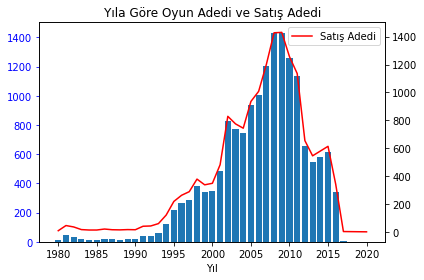

In [29]:
fig, ax1 = plt.subplots()
# Bar plot
ax1.bar(oyun_adetleri["Year"], oyun_adetleri["Name"])
ax1.set_xlabel('Yıl')
ax1.tick_params('y', colors='blue')

# İkinci y ekseni için
ax2 = ax1.twinx()
ax2.plot(oyun_adetleri["Year"], oyun_adetleri["Name"], color='red', linestyle='-', label='Satış Adedi')

# Başlık ve legend ekleme
plt.title('Yıla Göre Oyun Adedi ve Satış Adedi')
fig.tight_layout()

# Legend'ı gösterme
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()

<AxesSubplot:title={'center':'Yıllara Göre Yayınlanan Oyun Sayıları'}, xlabel='Year', ylabel='count'>

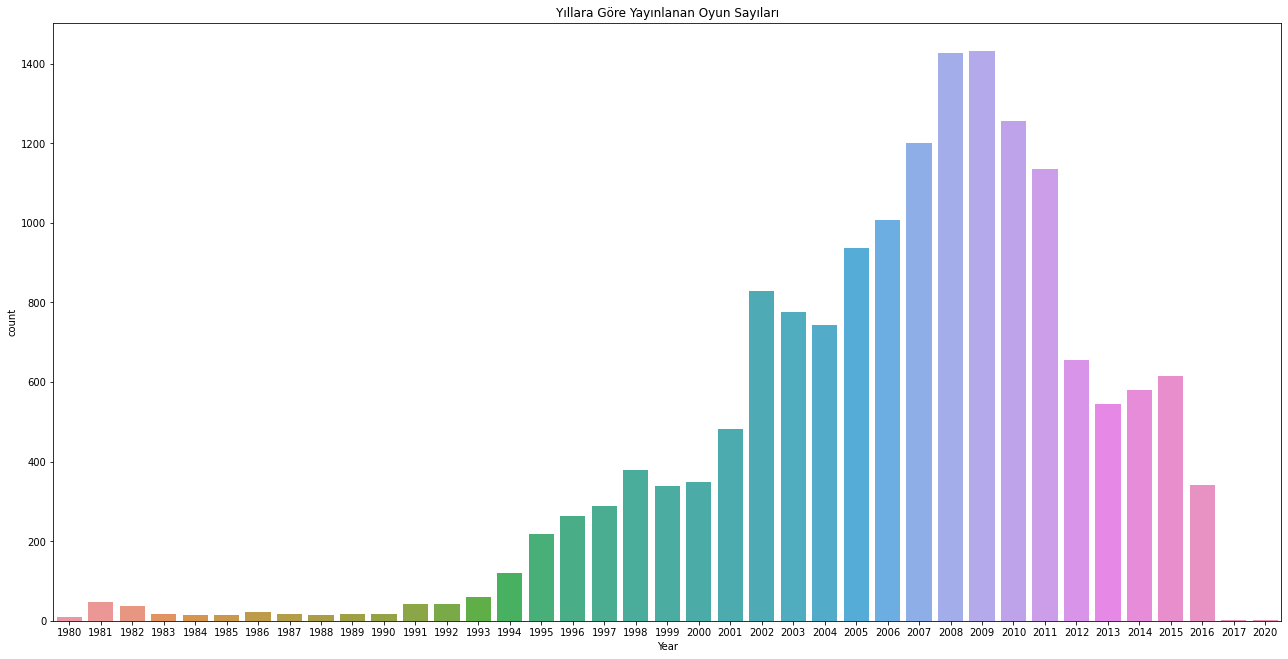

In [30]:

plt.figure(figsize=(22,11))
plt.title("Yıllara Göre Yayınlanan Oyun Sayıları")
sns.countplot(data=data,x='Year')

In [31]:
# en çok satış yapılan yıllar
data_year = data.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()

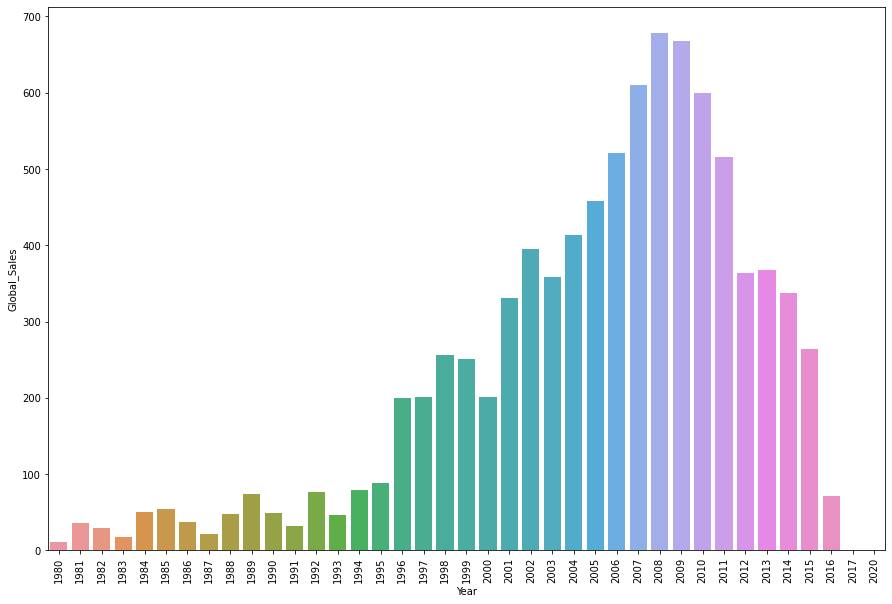

In [32]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="Global_Sales", data=data_year)
plt.xticks(rotation=90)
plt.show()

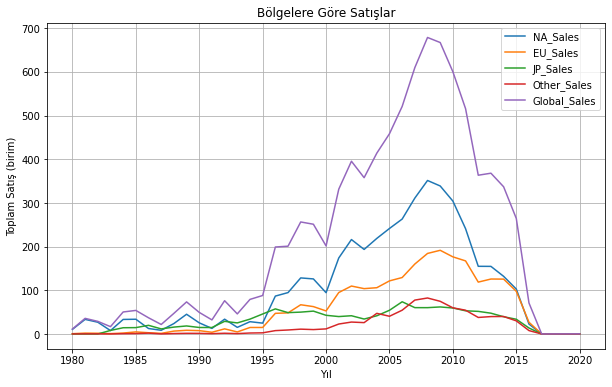

In [33]:
# Yıl ve kıtalara göre gruplayarak toplam satışları buluyoruz
grouped_df = data.groupby(['Year']).sum().reset_index()

# Çizgi grafiği oluştur
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Year'], grouped_df['NA_Sales'], label='NA_Sales')
plt.plot(grouped_df['Year'], grouped_df['EU_Sales'], label='EU_Sales')
plt.plot(grouped_df['Year'], grouped_df['JP_Sales'], label='JP_Sales')
plt.plot(grouped_df['Year'], grouped_df['Other_Sales'], label='Other_Sales')
plt.plot(grouped_df['Year'], grouped_df['Global_Sales'], label='Global_Sales')

# Grafik ayarları
plt.title('Bölgelere Göre Satışlar')
plt.xlabel('Yıl')
plt.ylabel('Toplam Satış (birim)')
plt.legend()
plt.grid(True)

# Grafiği göster veya kaydet
plt.show()

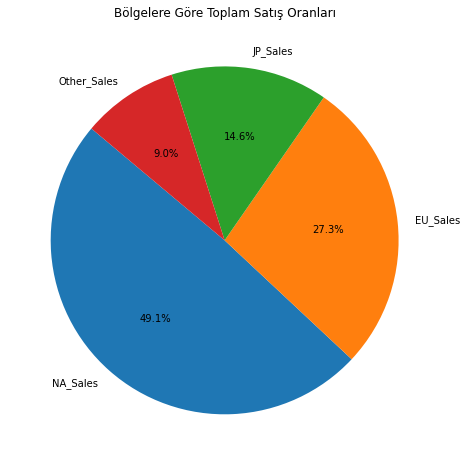

In [34]:
total_sales = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Pasta grafiği oluştur
plt.figure(figsize=(8, 8))
plt.pie(total_sales, labels=total_sales.index, autopct='%1.1f%%', startangle=140)

# Grafik ayarları
plt.title('Bölgelere Göre Toplam Satış Oranları')

# Grafiği göster veya kaydet
plt.show()

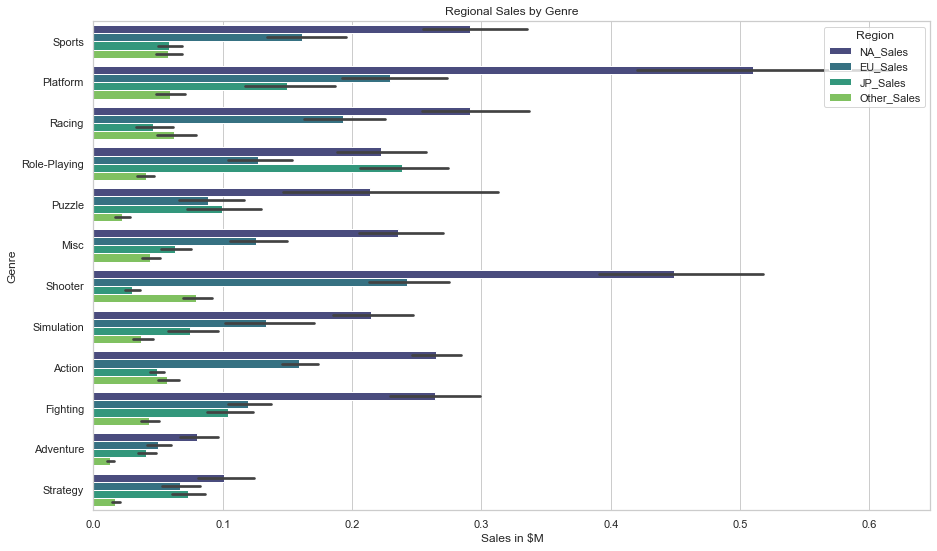

In [35]:
df_melted = pd.melt(data, id_vars=['Genre'], var_name='Region', value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], value_name='Sales')

# Çubuk grafiği oluşturun
plt.figure(figsize=(15, 9))
sns.set(style="whitegrid")
sns.barplot(x='Sales', y='Genre', hue='Region', data=df_melted, palette='viridis')

# Grafik özellikleri
plt.title('Regional Sales by Genre')
plt.xlabel('Sales in $M')
plt.ylabel('Genre')
plt.legend(title='Region', loc='upper right')
plt.show()

In [48]:
comp_genre=data[["Genre",'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_genre=comp_genre.groupby("Genre").sum()
comp_genre = comp_genre.reset_index()
comp_genre = pd.melt(comp_genre, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_genre.head()

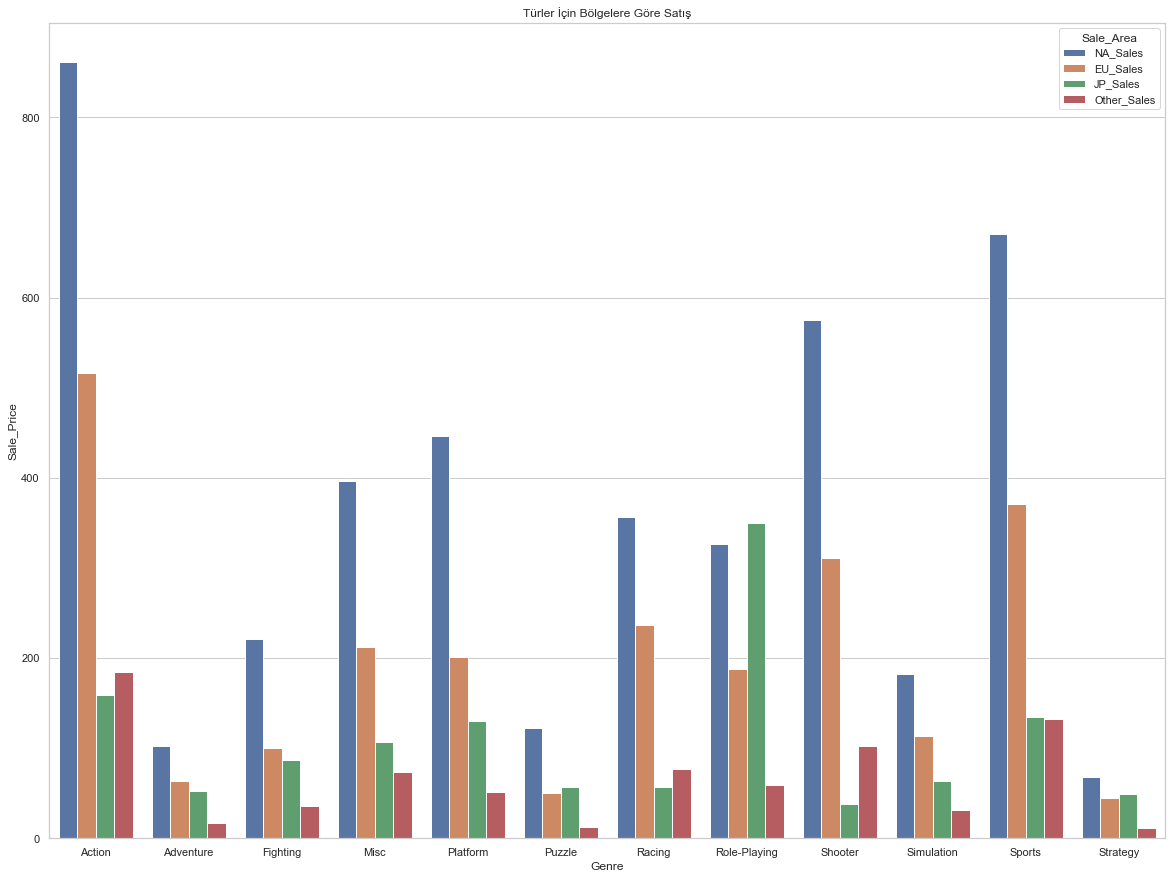

In [52]:
plt.figure(figsize=(20,15))
sns.barplot(x="Genre",y="Sale_Price",hue="Sale_Area",data=comp_genre)
plt.title("Türler İçin Bölgelere Göre Satış")
plt.show()

In [53]:
comp_platform=data[["Platform",'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_platform=comp_platform.groupby("Platform").sum()
comp_platform = comp_platform.reset_index()
comp_platform = pd.melt(comp_platform, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_platform.head()

,Platform,Sale_Area,Sale_Price
0,2600,NA_Sales,80.78
1,3DO,NA_Sales,0.00
2,3DS,NA_Sales,78.03
3,DC,NA_Sales,5.43
4,DS,NA_Sales,388.53


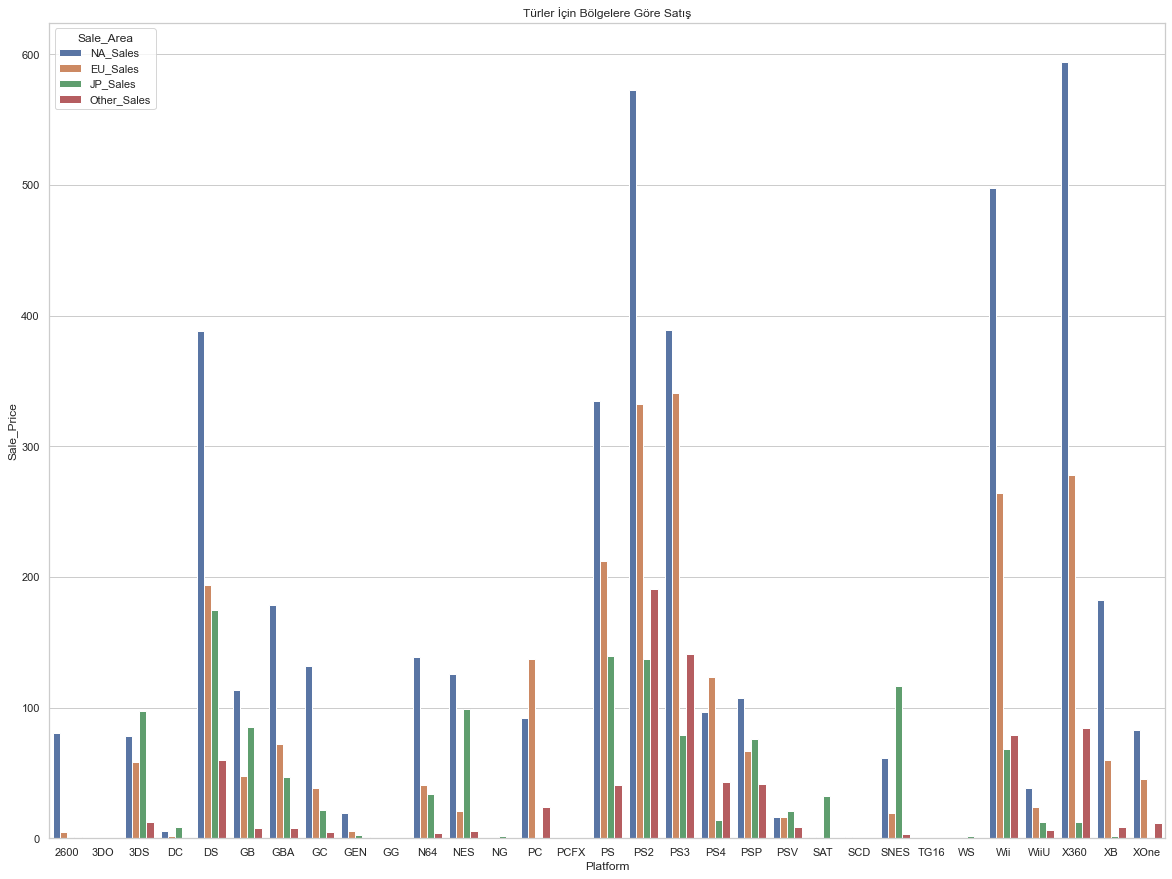

In [55]:
plt.figure(figsize=(20,15))
sns.barplot(x="Platform",y="Sale_Price",hue="Sale_Area",data=comp_platform)
plt.title("Türler İçin Bölgelere Göre Satış")
plt.show()

## Yıllara Göre En Çok Satış Yapan Oyun

In [36]:
top_game_sale = data.head(50)
top_game_sale = data[['Name', 'Year', 'Genre', 'Global_Sales']]
top_game_sale=top_game_sale.sort_values(by=['Global_Sales'], ascending=False).head(30)
top_game_sale=pd.DataFrame(top_game_sale).reset_index()

In [37]:
name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 30)

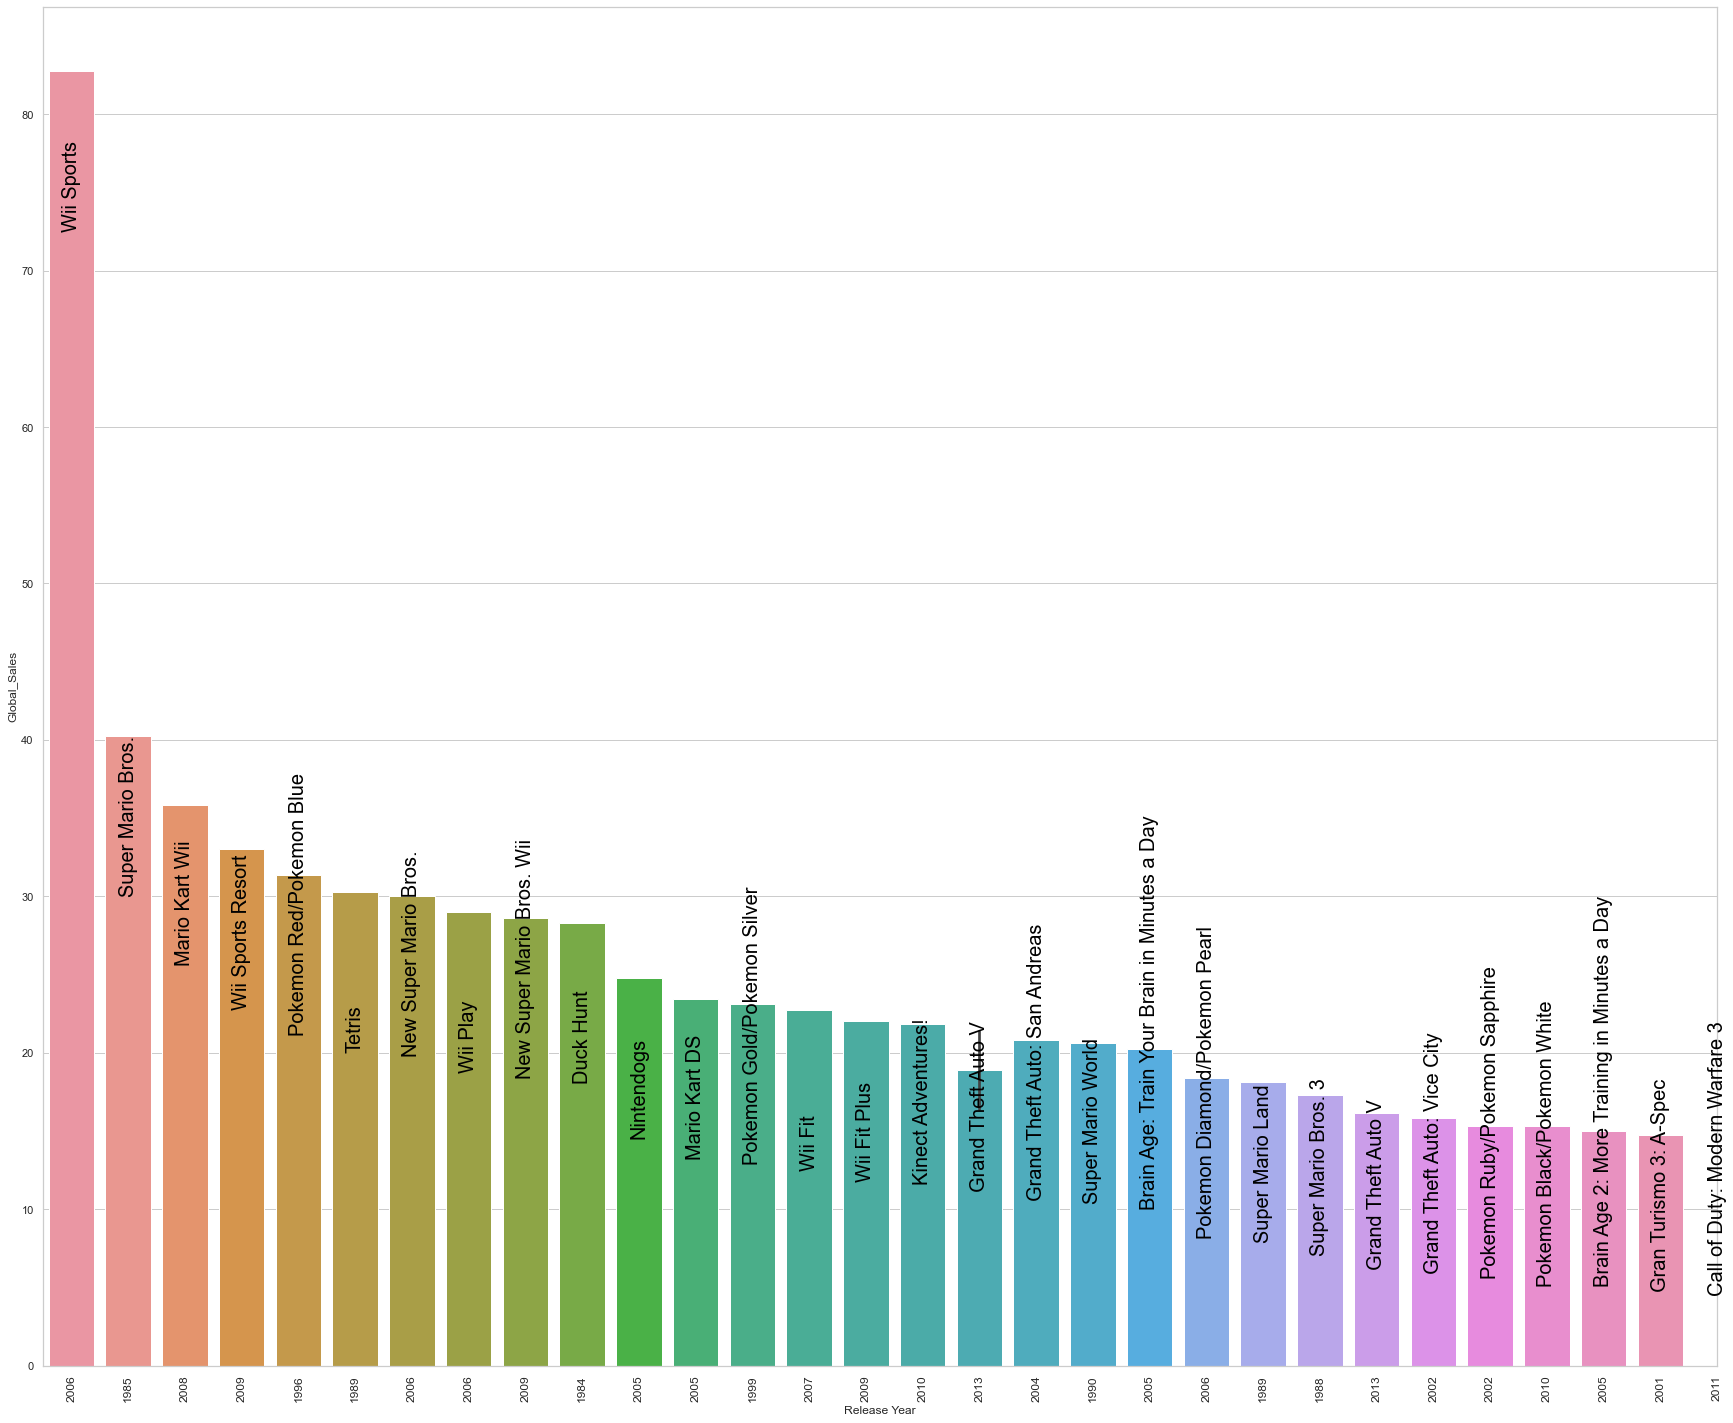

In [47]:
plt.figure(figsize=(30, 25))
g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale)
index = 0
for value in top_game_sale['Global_Sales']:
    g.text(index, value-10 , name[index], color='#000', size=20, rotation= 90, ha="center")
    index += 1

plt.xticks(y, top_game_sale['Year'], fontsize=12, rotation=90)
plt.xlabel('Release Year')
plt.show()

## Yıllara Göre En Çok Oyun Çıkaran Yayıncılar

In [39]:
top_publisher=data[["Year","Publisher"]]
top_publisher_df=top_publisher.groupby(["Year","Publisher"]).size().reset_index(name="Count")
top_publisher_idx=top_publisher_df.groupby(["Year"])["Count"].transform(max)==top_publisher_df['Count']
top_publisher_count=top_publisher_df[top_publisher_idx].reset_index(drop=True)
top_publisher_count=top_publisher_count.drop_duplicates(subset=["Year","Count"],keep="last").reset_index(drop=True)

In [40]:
publisher= top_publisher_count['Publisher']

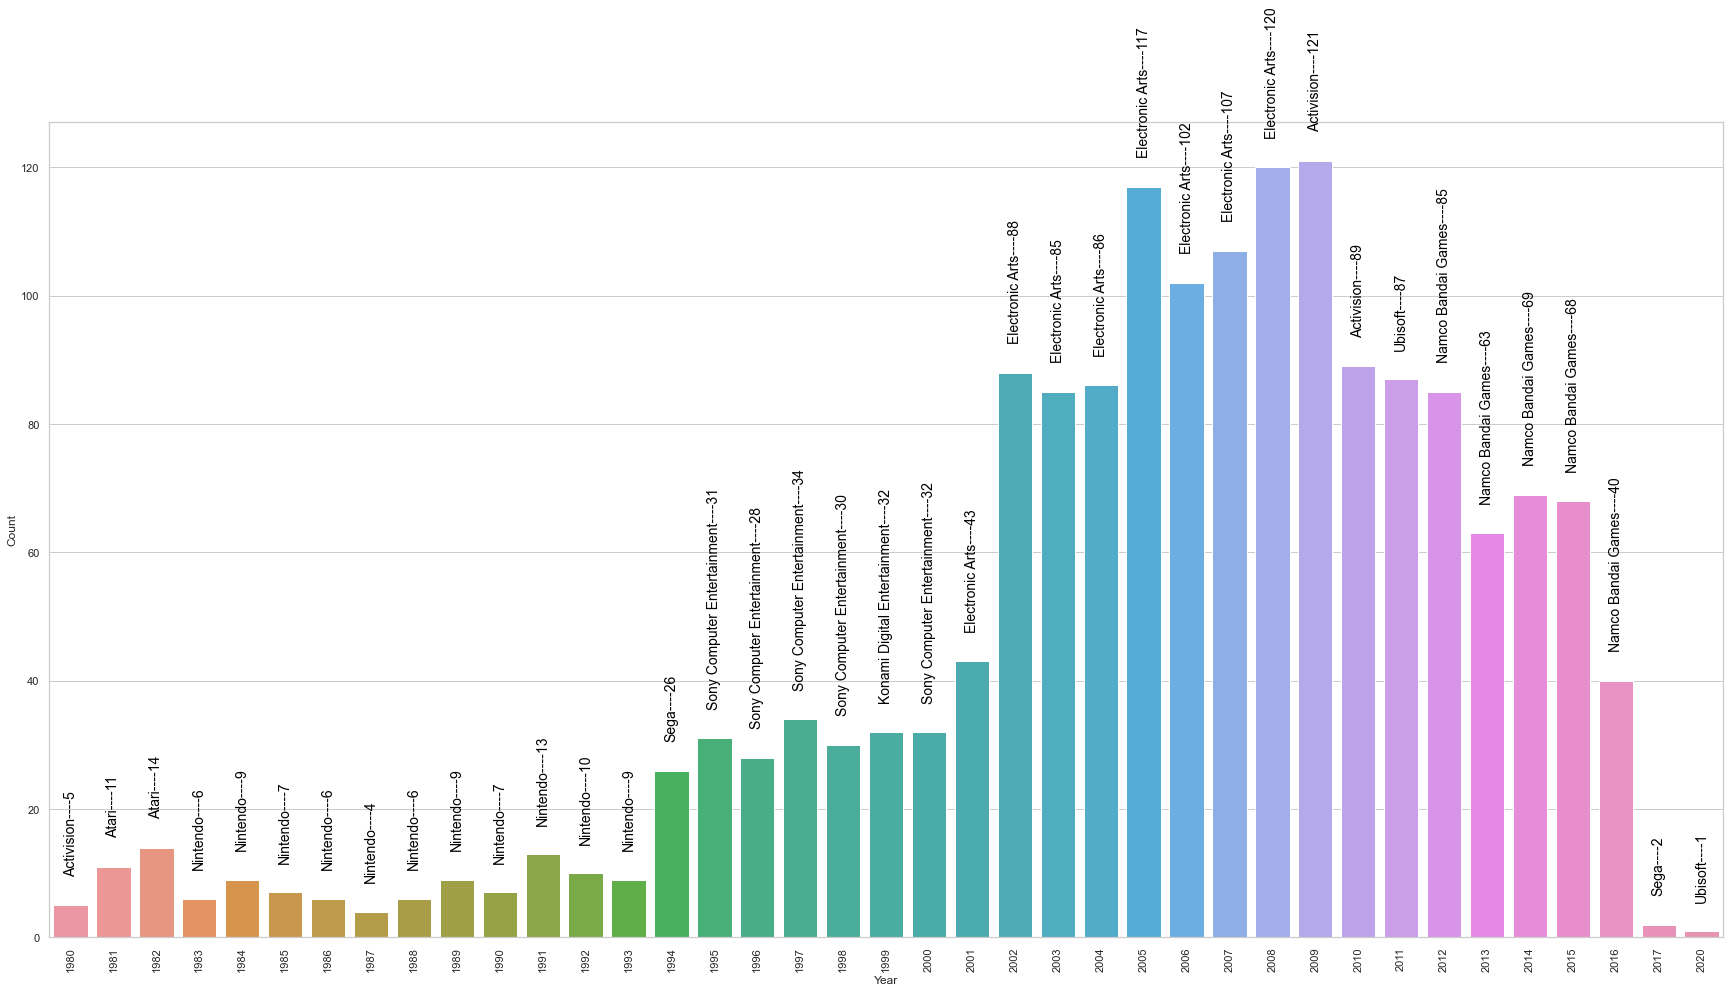

In [41]:

plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='Count', data=top_publisher_count)
index = 0
for value in top_publisher_count['Count'].values:
#     print(asd)
    g.text(index, value + 5, str(publisher[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1




plt.xticks(rotation=90)
plt.show()

#### Çıkarımlar 
Dünya çapındaki satışlar 90'lı yılların başında artmaya başladı ve 2011 yılına kadar büyük oranda  yavaşlamadı. 2009/2010, video oyunlarının açık ara altın çağıydı.

Platform pazarı söz konusu olduğunda Nintendo'nun bir güç merkezi olduğunu söylenebilir.Xbox 360'ın büyük bir hit olması nedeniyle tek rakibi Microsoft'tur.
